In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
%pip install tensorflow

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD

Importing dataset and splitting into training,validation and testing.

In [ ]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)= mnist.load_data()
#X_train.shape  --> (60000, 28, 28)
#X_test.shape   --> (10000, 28, 28)
X_data = np.concatenate((X_train,X_test),axis=0)
y_data = np.concatenate((y_train,y_test),axis=0)
#X_data.shape   --> (70000, 28, 28)

In [ ]:
X_train,X_val,X_test = np.split(X_data,[52500,59500])
y_train,y_val,y_test = np.split(y_data,[52500,59500])

Pre-Processing

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_val  = X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [ ]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

One -hot encoding

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

Model


In [ ]:
cnn = Sequential([
    Conv2D(filters=6,input_shape= (28,28, 1), kernel_size=(5, 5), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(120, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
opt = SGD(learning_rate=0.01)
cnn.compile(optimizer=opt,
              loss = keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 120)              

In [ ]:
history = cnn.fit(X_train, y_train,epochs=5,validation_data = (X_val,y_val))

Epoch 1/5
1641/1641 [==============================] - 38s 23ms/step - loss: 0.5014 - accuracy: 0.8448 - val_loss: 0.1499 - val_accuracy: 0.9563
Epoch 2/5
1641/1641 [==============================] - 36s 22ms/step - loss: 0.1395 - accuracy: 0.9567 - val_loss: 0.1030 - val_accuracy: 0.9701
Epoch 3/5
1641/1641 [==============================] - 37s 23ms/step - loss: 0.1002 - accuracy: 0.9688 - val_loss: 0.0803 - val_accuracy: 0.9734
Epoch 4/5
1641/1641 [==============================] - 36s 22ms/step - loss: 0.0803 - accuracy: 0.9746 - val_loss: 0.0807 - val_accuracy: 0.9756
Epoch 5/5
1641/1641 [==============================] - 36s 22ms/step - loss: 0.0696 - accuracy: 0.9780 - val_loss: 0.0588 - val_accuracy: 0.9816


1a : Training and Validation Accuracy

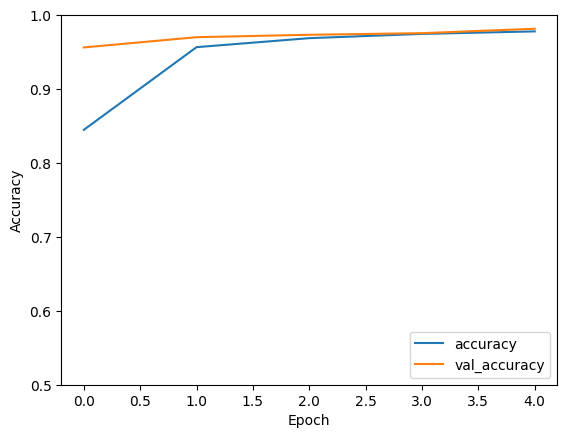

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

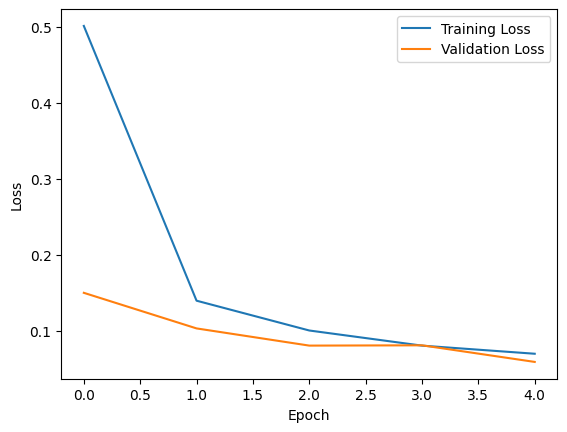

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

1b


In [ ]:
test_loss, test_acc = cnn.evaluate(X_test,y_test)
print("Test accuracy : ", test_acc)

329/329 [==============================] - 3s 9ms/step - loss: 0.0638 - accuracy: 0.9813
Test accuracy :  0.981333315372467


In [ ]:
from sklearn.metrics import  classification_report
y_pred = np.round(cnn.predict(X_test))

print("Classification Report: \n", classification_report(y_test, y_pred))


329/329 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1026
           1       0.99      0.99      0.99      1189
           2       0.99      0.98      0.98      1084
           3       0.99      0.98      0.98      1058
           4       0.99      0.97      0.98      1033
           5       0.99      0.97      0.98       936
           6       0.99      0.98      0.98      1013
           7       0.98      0.98      0.98      1083
           8       0.97      0.99      0.98      1020
           9       0.97      0.97      0.97      1058

   micro avg       0.98      0.98      0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500
 samples avg       0.98      0.98      0.98     10500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


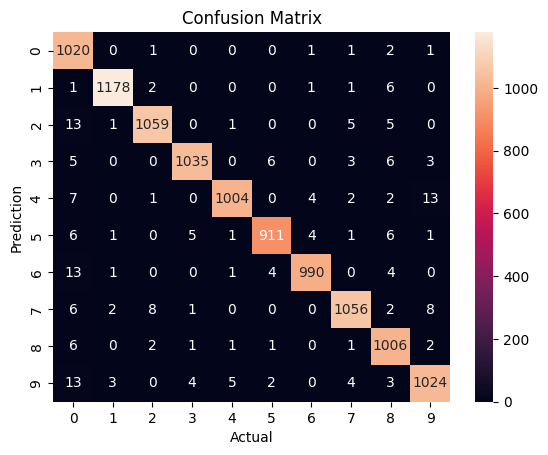

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix([np.argmax(i) for i in y_test],[np.argmax(j) for j in y_pred])

sns.heatmap(cm,
            annot = True,
            fmt='g',
            xticklabels = ['0','1','2','3','4','5','6','7','8','9'],
            yticklabels = ['0','1','2','3','4','5','6','7','8','9'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()